# Notebook 2 - Fuel property modeling

By Vincent Blay, Tijana Radivojevic November 2021 - May 2022

This notebook was developed using **RPReactor 3.8** kernel on [jprime.lbl.gov](https://gpu2.ese.lbl.gov/).

In this notebook we demonstrate the use of MACAW embeddings to describe molecules and train regression models of different molecular properties. The results illustrate the usefulness and speed of the approach and its compatibility with small and medium-sized datasets that are commonly found in the biosciences.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVR

import sys
sys.path.append('../')

import macaw
print(macaw.__version__)
from macaw import *

%run "./plotting.py"

1.0.1


In [2]:
%config InlineBackend.figure_format = 'retina'

## Research Octane Number (RON)

Let us load the data and look at the distribution:

In [3]:
df = pd.read_csv("./data/data_RON.csv")
smiles = df.Smiles
Y = df.RON
print(len(smiles))

194


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


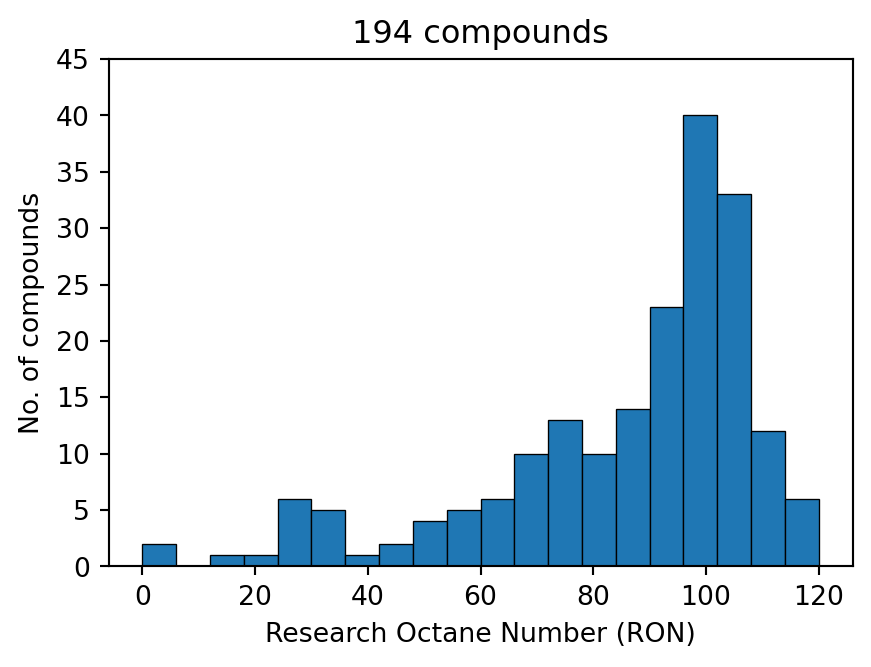

In [4]:
plot_histogram(Y, xlabel="Research Octane Number (RON)")

Define the partitions for cross-validation.

In [5]:
num_of_partitions = 10
kf = KFold(n_splits=num_of_partitions, shuffle=True, random_state=42)

Define hyperparameters for SVR:

In [6]:
param_grid = {
    'C': [1, 5, 7, 10, 30, 50, 100, 300, 500], 
    'epsilon': [0.1, 0.3, 1, 3, 5, 10, 20],
    'kernel': ['rbf']
}

In [7]:
%%time

Y_cv_pred = []
Y_obs = []  # we store a new array of observations as indices of Y are shuffled

i = 1
for train_index, val_index in kf.split(smiles):
    print(f"Partition {i}/{num_of_partitions}")
    i+=1
    # Generate train-validation partition from indices
    smi_train , smi_val = smiles.iloc[train_index], smiles.iloc[val_index]
    y_train , y_val = Y[train_index], Y[val_index]
    
    # Compute MACAW embeddings
    mcw = MACAW_optimus(
        smi_train, 
        y=y_train, 
        n_components=15,
        verbose=False, 
        n_landmarks=100, 
        random_state=57
    )
    
    X_train = mcw.transform(smi_train)
    X_val = mcw.transform(smi_val)
    
    # Train the SVR model
    # Optimize hyperparameters
    grid = GridSearchCV(
        SVR(), 
        param_grid, 
        scoring='r2',
        cv=5, 
        refit=True)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    # Test set predictions
    y_cv_pred = grid.predict(X_val)
    
    # Save corresponding validation instances
    Y_cv_pred.extend(y_cv_pred)
    Y_obs.extend(y_val)

Partition 1/10
Problem type identified as regression
Setting recommended combination: layered & cosine
{'C': 30, 'epsilon': 3, 'kernel': 'rbf'}
Partition 2/10
Problem type identified as regression
Setting recommended combination: layered & kulczynski
{'C': 10, 'epsilon': 3, 'kernel': 'rbf'}
Partition 3/10
Problem type identified as regression
Setting recommended combination: maccs & tanimoto
{'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
Partition 4/10
Problem type identified as regression
Setting recommended combination: atompairs & sokal
{'C': 30, 'epsilon': 3, 'kernel': 'rbf'}
Partition 5/10
Problem type identified as regression
Setting recommended combination: rdk7 & tanimoto
{'C': 50, 'epsilon': 5, 'kernel': 'rbf'}
Partition 6/10
Problem type identified as regression
Setting recommended combination: layered & tanimoto
{'C': 30, 'epsilon': 1, 'kernel': 'rbf'}
Partition 7/10
Problem type identified as regression
Setting recommended combination: layered & sokal
{'C': 30, 'epsilon': 3, 'ker

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


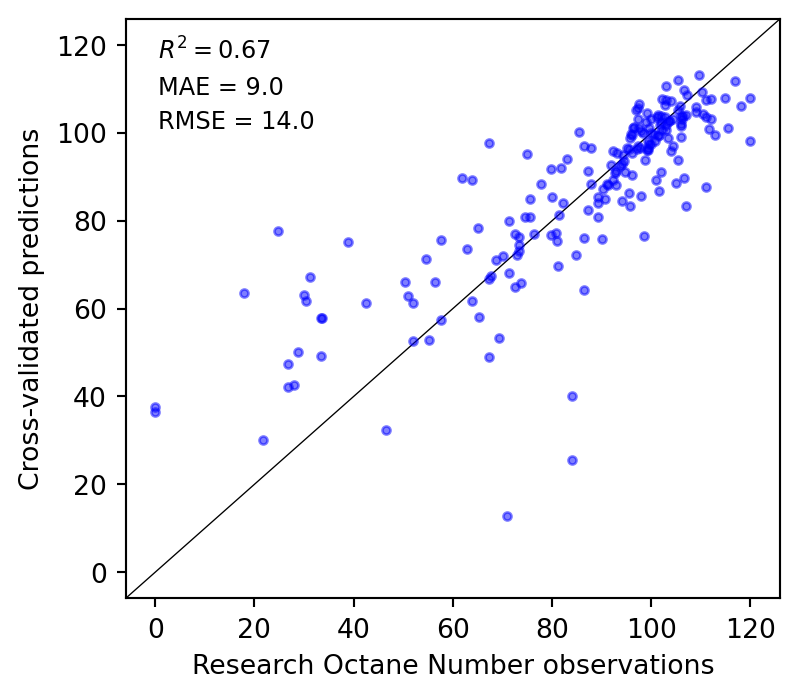

In [8]:
# Parity plot
parity_plot(x=Y_obs,
            y=Y_cv_pred, 
            xlabel="Research Octane Number observations", 
            ylabel="Cross-validated predictions",
            savetitle='./results/macaw/RON.svg') 

## Cetane Number (CN)

Here we demonstrate how MACAW embeddings can help model cetane numbers. We will use a similar approach as above. First we load the data:

In [42]:
df = pd.read_csv("./data/data_CN.csv")
smiles = df.Smiles
Y = df.CN
print(len(smiles))

545


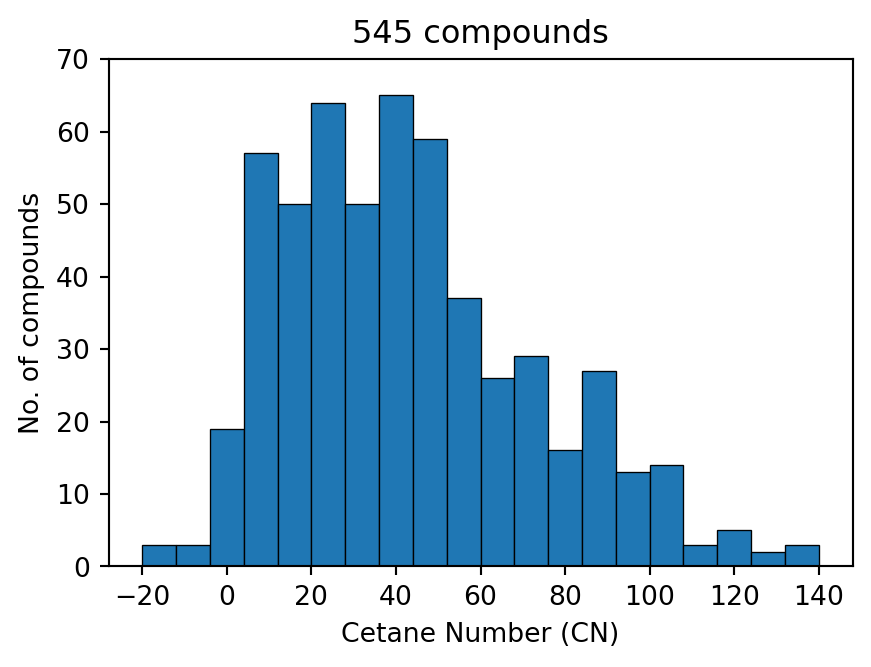

In [43]:
plot_histogram(Y, xlabel="Cetane Number (CN)")

In [45]:
%%time

Y_cv_pred = []
Y_obs = []

i = 1
for train_index, val_index in kf.split(smiles):
    print(f"Partition {i}/{num_of_partitions}")
    i+=1
    smi_train , smi_val = smiles.iloc[train_index], smiles.iloc[val_index]
    y_train , y_val = Y[train_index], Y[val_index]
    
    # Compute MACAW embeddings
    mcw = MACAW_optimus(
        smi_train, 
        y=y_train, 
        n_components=15,
        verbose=False, 
        n_landmarks=100, 
        random_state=77
    )
    
    X_train = mcw.transform(smi_train)
    X_val = mcw.transform(smi_val)
    
    # Train the SVR model
    # Optimize hyperparameters
    grid = GridSearchCV(SVR(), param_grid, cv=5, refit=True)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    # Test set predictions
    y_cv_pred = grid.predict(X_val)
    
    # Save corresponding validation instances
    Y_cv_pred.extend(y_cv_pred)
    Y_obs.extend(y_val)

Partition 1/10
Problem type identified as regression
Setting recommended combination: atompairs & sokal
{'C': 100, 'epsilon': 3, 'kernel': 'rbf'}
Partition 2/10
Problem type identified as regression
Setting recommended combination: atompairs & sokal
{'C': 100, 'epsilon': 5, 'kernel': 'rbf'}
Partition 3/10
Problem type identified as regression
Setting recommended combination: atompairs & sokal
{'C': 50, 'epsilon': 5, 'kernel': 'rbf'}
Partition 4/10
Problem type identified as regression
Setting recommended combination: atompairs & tanimoto
{'C': 100, 'epsilon': 3, 'kernel': 'rbf'}
Partition 5/10
Problem type identified as regression
Setting recommended combination: atompairs & mcconnaughey
{'C': 300, 'epsilon': 5, 'kernel': 'rbf'}
Partition 6/10
Problem type identified as regression
Setting recommended combination: atompairs & rogot-goldberg
{'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
Partition 7/10
Problem type identified as regression
Setting recommended combination: atompairs & sokal


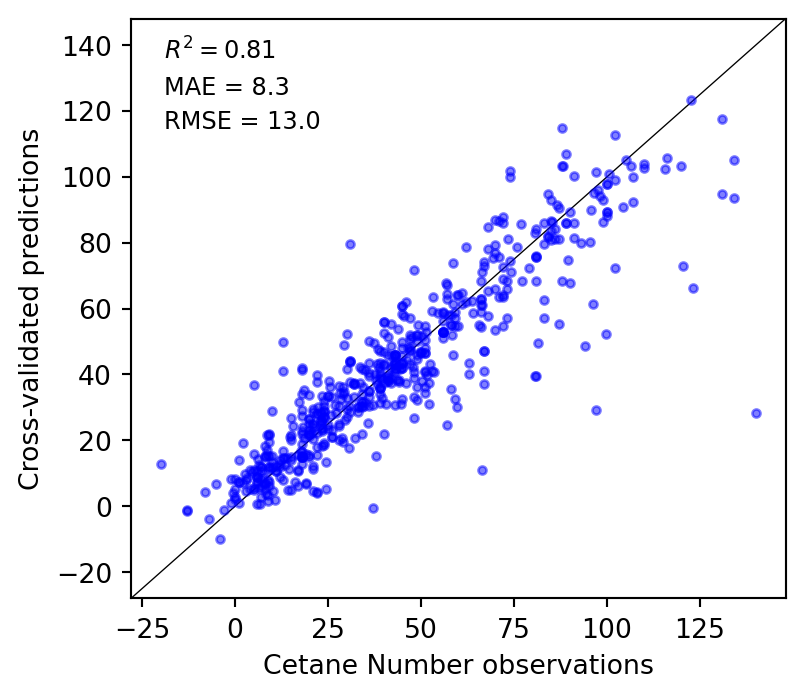

In [46]:
# Parity plot
parity_plot(x=Y_obs,
            y=Y_cv_pred, 
            xlabel="Cetane Number observations", 
            ylabel="Cross-validated predictions",
            savetitle='./results/macaw/CN.svg') 

##  Melting Point (MP)

In [4]:
df = pd.read_csv("./data/data_MP.csv")
smiles = df.Smiles
Y = df.mpC
print(len(smiles))

27976


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


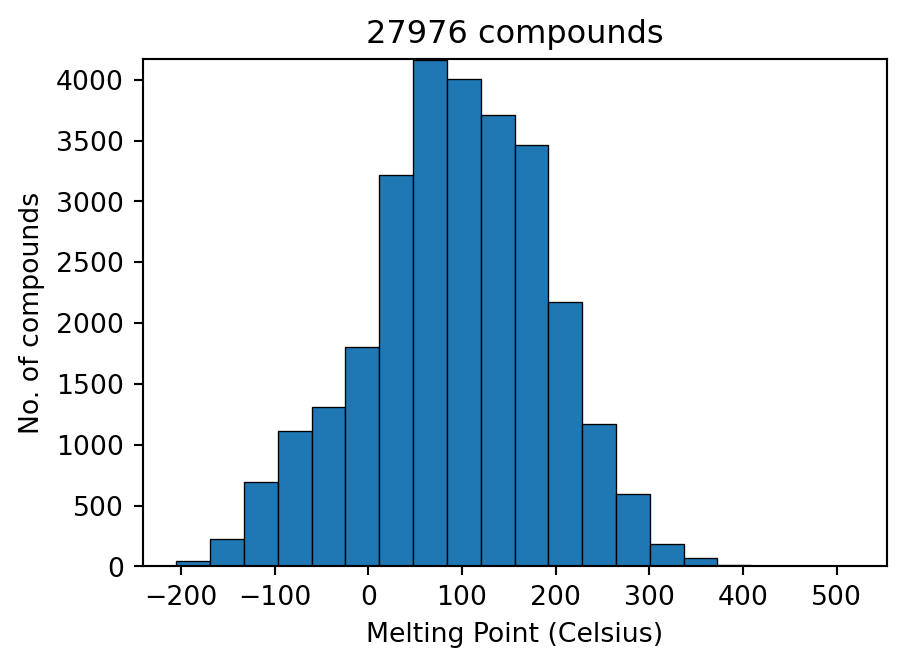

In [5]:
plot_histogram(Y, xlabel="Melting Point (Celsius)")

In [6]:
param_grid = {
    'C': [100, 300, 500], 
    'epsilon': [3, 5, 10, 20],
    'kernel': ['rbf']
}

In [7]:
%%time

Y_cv_pred = []
Y_obs = []

i = 1
for train_index, val_index in kf.split(smiles):
    print(f"Partition {i}/{num_of_partitions}")
    i+=1
    smi_train , smi_val = smiles.iloc[train_index], smiles.iloc[val_index]
    y_train , y_val = Y[train_index], Y[val_index]
    
    # Compute MACAW embeddings
    mcw = MACAW(
        type_fp='maccs', 
        metric='tanimoto', 
        n_landmarks=100, 
        random_state=51
    )
    mcw.fit(smi_train, Y=y_train)
    
    X_train = mcw.transform(smi_train)
    X_val = mcw.transform(smi_val)
    
    # Train the SVR model
    # Optimize hyperparameters
    grid = GridSearchCV(SVR(), param_grid, cv=5, refit=True)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    # Test set predictions
    y_cv_pred = grid.predict(X_val)
    
    # Save corresponding validation instances
    Y_cv_pred.extend(y_cv_pred)
    Y_obs.extend(y_val)

Partition 1/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 2/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 3/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 4/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 5/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 6/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 7/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 8/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 9/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 10/10
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
CPU times: user 5h 39min 12s, sys: 2min 32s, total: 5h 41min 45s
Wall time: 5h 39min 26s


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


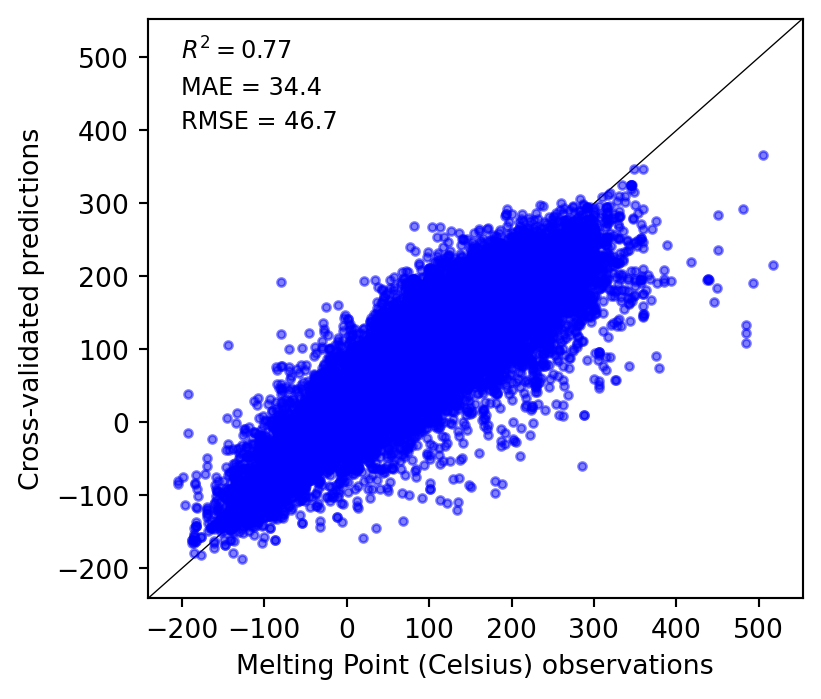

In [8]:
# Parity plot
parity_plot(x=Y_obs,
            y=Y_cv_pred, 
            xlabel="Melting Point (Celsius) observations", 
            ylabel="Cross-validated predictions",
            savetitle='./results/macaw/MP.svg') 

## Flash Point (FP)

In [37]:
df = pd.read_csv("./data/data_FP.csv")
smiles = df.Smiles
Y = df.FP
print(len(smiles))

631


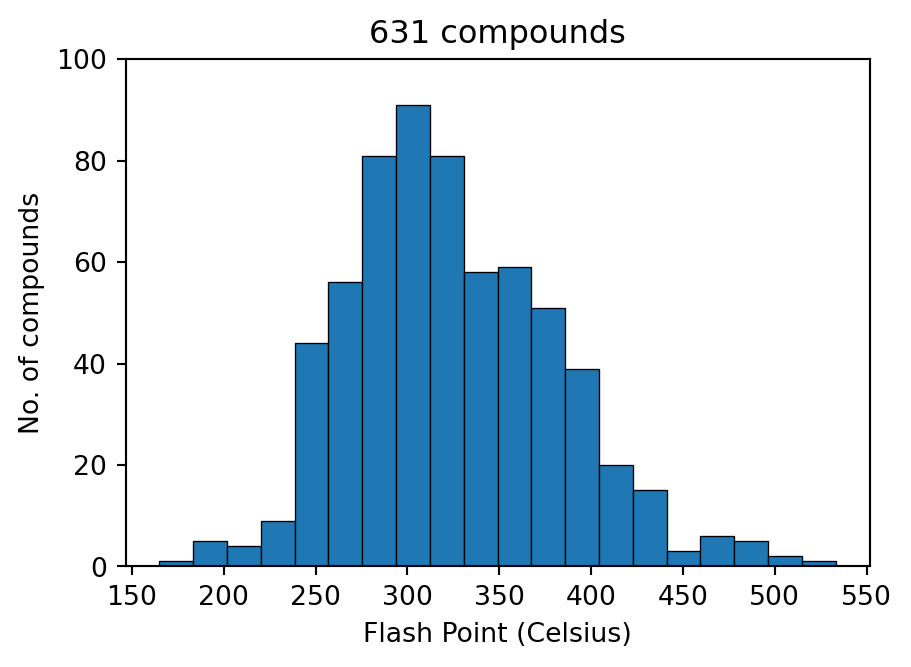

In [38]:
plot_histogram(Y, xlabel="Flash Point (Celsius)")

In [39]:
param_grid = {
    'C': [1, 5, 7, 10, 30, 50, 100, 300, 500], 
    'epsilon': [0.1, 0.3, 1, 3, 5, 10, 20],
    'kernel': ['rbf']
}

In [40]:
%%time

Y_cv_pred = []
Y_obs = []

i = 1
for train_index, val_index in kf.split(smiles):
    print(f"Partition {i}/{num_of_partitions}")
    i+=1
    smi_train , smi_val = smiles.iloc[train_index], smiles.iloc[val_index]
    y_train , y_val = Y[train_index], Y[val_index]
    
    # Compute MACAW embeddings
    mcw = MACAW_optimus(
        smi_train, 
        y=y_train, 
        C=100,
        exhaustiveness=3,
        verbose=False, 
        random_state=521
    )
    
    X_train = mcw.transform(smi_train)
    X_val = mcw.transform(smi_val)
    
    # Train the SVR model
    # Optimize hyperparameters
    grid = GridSearchCV(SVR(), param_grid, cv=5, refit=True)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    # Test set predictions
    y_cv_pred = grid.predict(X_val)
    
    # Save corresponding validation instances
    Y_cv_pred.extend(y_cv_pred)
    Y_obs.extend(y_val)

Partition 1/10
Problem type identified as regression
Setting recommended combination: pattern+maccs & cosine
{'C': 500, 'epsilon': 10, 'kernel': 'rbf'}
Partition 2/10
Problem type identified as regression
Setting recommended combination: pattern+maccs & tanimoto
{'C': 300, 'epsilon': 5, 'kernel': 'rbf'}
Partition 3/10
Problem type identified as regression
Setting recommended combination: pattern+maccs & cosine
{'C': 100, 'epsilon': 10, 'kernel': 'rbf'}
Partition 4/10
Problem type identified as regression
Setting recommended combination: pattern+maccs & mcconnaughey
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 5/10
Problem type identified as regression
Setting recommended combination: pattern+maccs & cosine
{'C': 500, 'epsilon': 20, 'kernel': 'rbf'}
Partition 6/10
Problem type identified as regression
Setting recommended combination: pattern+secfp6 & manhattan
{'C': 300, 'epsilon': 20, 'kernel': 'rbf'}
Partition 7/10
Problem type identified as regression
Setting recommended comb

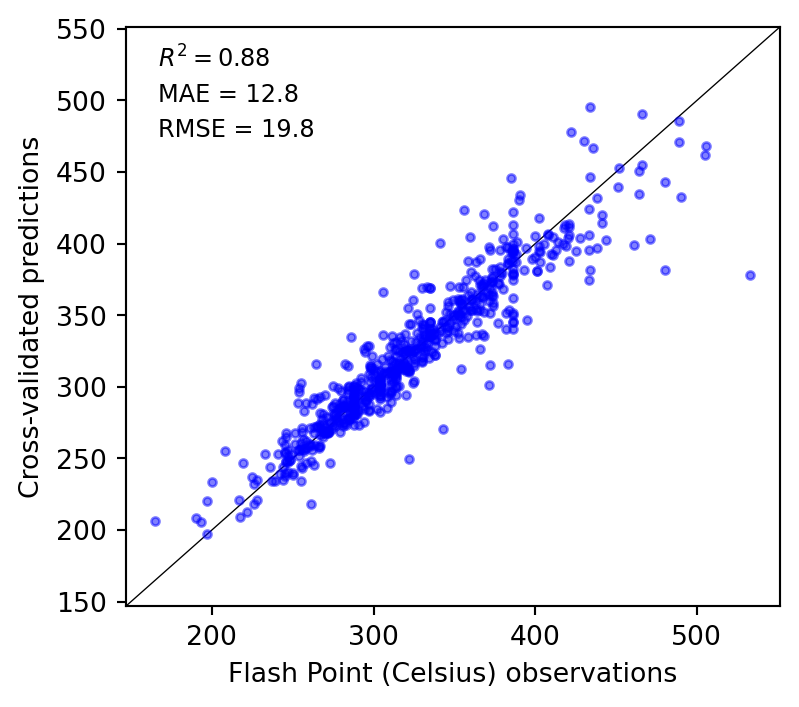

In [41]:
# Parity plot
parity_plot(x=Y_obs,
            y=Y_cv_pred, 
            xlabel="Flash Point (Celsius) observations", 
            ylabel="Cross-validated predictions",
            savetitle='./results/macaw/FP.svg') 